<a href="https://www.kaggle.com/code/federeinhardt/weekly-sales-analysis-for-multiple-stores-walmart?scriptVersionId=159998260" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv

Weekly Sales Analysis for Multiple Stores: Trends, Correlations, and Holiday Impact

1. What is the average weekly sales for each store?
2. What is the total weekly sales for all stores?
3. What is the standard deviation of weekly sales for all stores?
4. Violin Plot of Weekly Sales
5. How many holiday weeks are there in the dataset?
6. What is the total weekly sales during holiday weeks?
7. What is the correlation between weekly sales and temperature?
8. What is the correlation between weekly sales and fuel price?
9. Correlation between weekly sales and CPI

In [3]:
df=pd.read_csv('/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# 1. What is the average weekly sales for each store?

In [7]:
average_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean()

print(average_weekly_sales)



Store
1     1.555264e+06
2     1.925751e+06
3     4.027044e+05
4     2.094713e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.899425e+06
11    1.356383e+06
12    1.009002e+06
13    2.003620e+06
14    2.020978e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.107677e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.775216e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


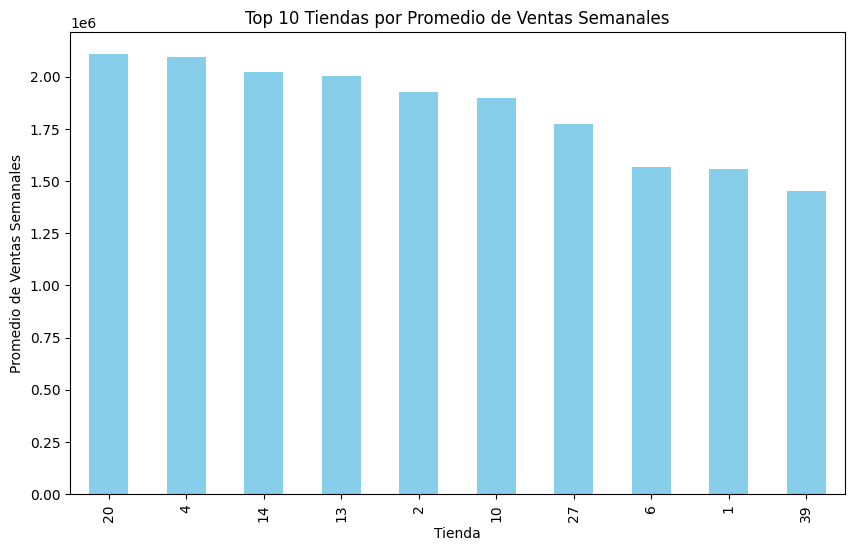

In [8]:
top_10_stores = average_weekly_sales.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_stores.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tiendas por Promedio de Ventas Semanales')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Ventas Semanales')
plt.show()

# 2. What is the total weekly sales for all stores?

In [9]:
total_weekly_sales = df['Weekly_Sales'].sum()

print(f"Las ventas semanales totales para todas las tiendas son: {total_weekly_sales}")


Las ventas semanales totales para todas las tiendas son: 6737218987.11


# 3. What is the standard deviation of weekly sales for all stores?

In [10]:
std_dev_weekly_sales = df['Weekly_Sales'].std()


print(f"La desviación estándar de las ventas semanales para todas las tiendas es: {std_dev_weekly_sales}")

La desviación estándar de las ventas semanales para todas las tiendas es: 564366.6220536975


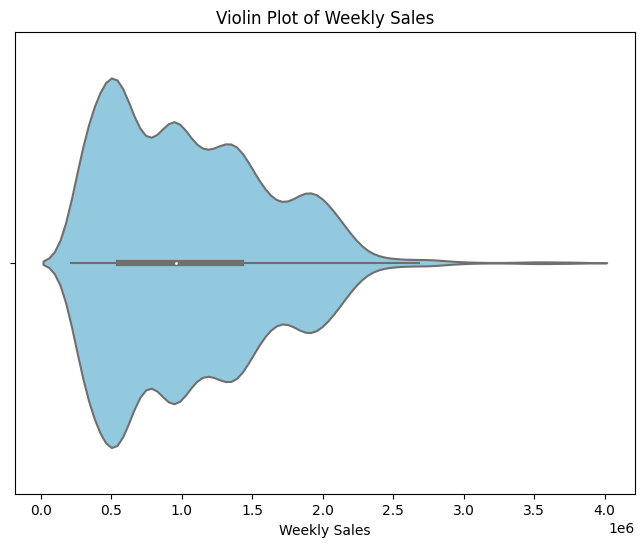

In [11]:
plt.figure(figsize=(8, 6))

sns.violinplot(x=df['Weekly_Sales'], color='skyblue')

# Set title and labels
plt.title('Violin Plot of Weekly Sales')
plt.xlabel('Weekly Sales')


plt.show()

Este diagrama de caja visualiza la distribución y la desviación estándar de las ventas semanales. La línea en el centro de la caja representa la mediana de los datos, mientras que los bordes inferior y superior de la caja representan el primer cuartil (Q1) y el tercer cuartil (Q3) de los datos, respectivamente. Las líneas exteriores muestran la dispersión de los datos y los valores atípicos más allá de las líneas exteriores. A medida que aumenta la desviación estándar, la distribución de los datos y el tamaño de la caja también se ampliarán. Los valores atípicos pueden observarse como puntos de datos más allá de las líneas exteriores.

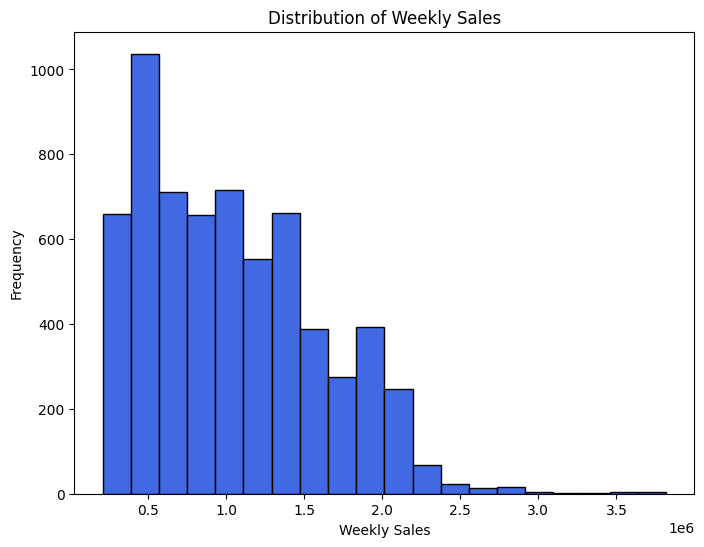

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Weekly_Sales'], bins=20, color='royalblue', edgecolor='black')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

Este gráfico de histograma muestra la distribución de las ventas semanales y nos ayuda a comprender la densidad de los datos. Cuanto mayor sea la desviación estándar, más amplia y dispersa será la distribución de los datos.

# 5. How many holiday weeks are there in the dataset?

In [13]:
num_holiday_weeks = df[df['Holiday_Flag'] == 1]['Holiday_Flag'].count()
print("Number of holiday weeks:", num_holiday_weeks)

Number of holiday weeks: 450


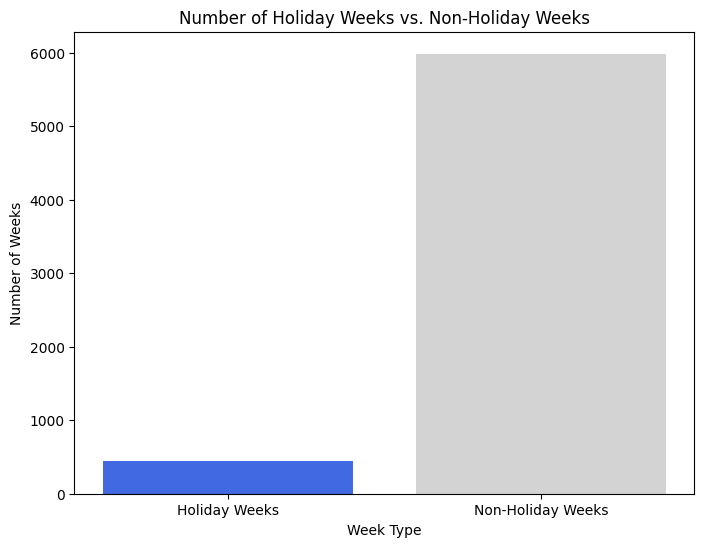

In [14]:
num_holiday_weeks = df[df['Holiday_Flag'] == 1]['Holiday_Flag'].count()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Holiday Weeks', 'Non-Holiday Weeks'], [num_holiday_weeks, len(df) - num_holiday_weeks], color=['royalblue', 'lightgray'])
plt.xlabel('Week Type')
plt.ylabel('Number of Weeks')
plt.title('Number of Holiday Weeks vs. Non-Holiday Weeks')
plt.show()

# 6. What is the total weekly sales during holiday weeks?¶

In [15]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
print("Total weekly sales during holiday weeks:", holiday_sales)

Total weekly sales during holiday weeks: 505299551.56


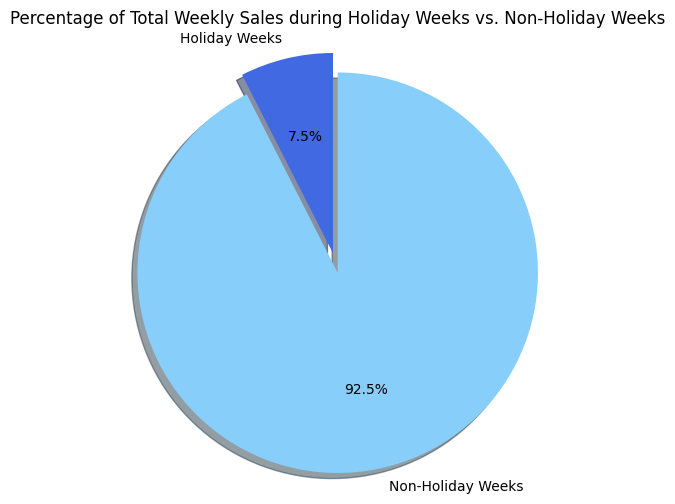

In [16]:
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()


plt.figure(figsize=(8, 6))
labels = ['Holiday Weeks', 'Non-Holiday Weeks']
sizes = [holiday_sales, non_holiday_sales]
colors = ['royalblue', 'lightskyblue']
explode = [0.1, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Total Weekly Sales during Holiday Weeks vs. Non-Holiday Weeks')
plt.show()

# 7. What is the correlation between weekly sales and temperature?

In [17]:
corr_sales_temp = df['Weekly_Sales'].corr(df['Temperature'])
print("Correlation between weekly sales and temperature:", corr_sales_temp)

Correlation between weekly sales and temperature: -0.06381001317946956


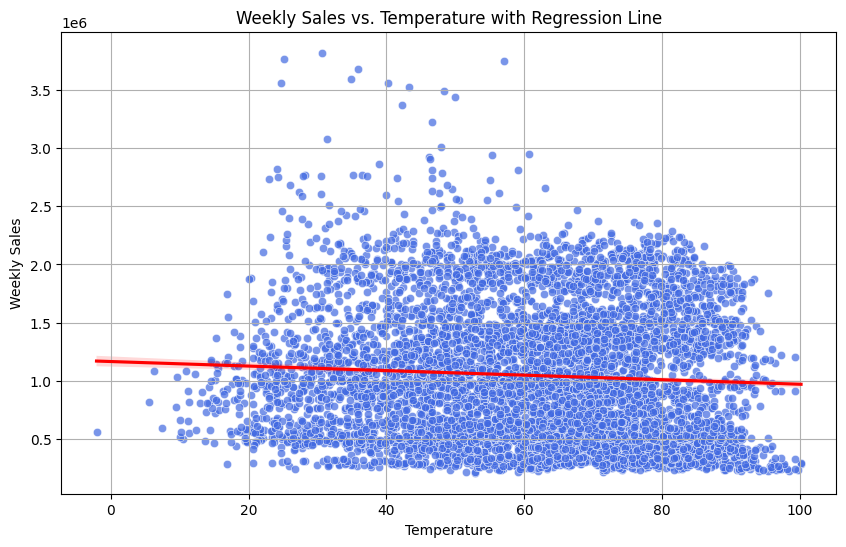

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', color='royalblue', alpha=0.7)

sns.regplot(data=df, x='Temperature', y='Weekly_Sales', color='red', scatter=False)

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature with Regression Line')
plt.grid(True)
plt.show()

Cada punto representa las ventas semanales y las temperaturas. Además, la línea de regresión ilustra una posible relación entre la temperatura y las ventas semanales. Si los puntos están cerca de la línea, puede haber una correlación positiva entre la temperatura y las ventas. Por el contrario, si los puntos están lejos de la línea, podría haber una relación menos pronunciada entre las dos variables.

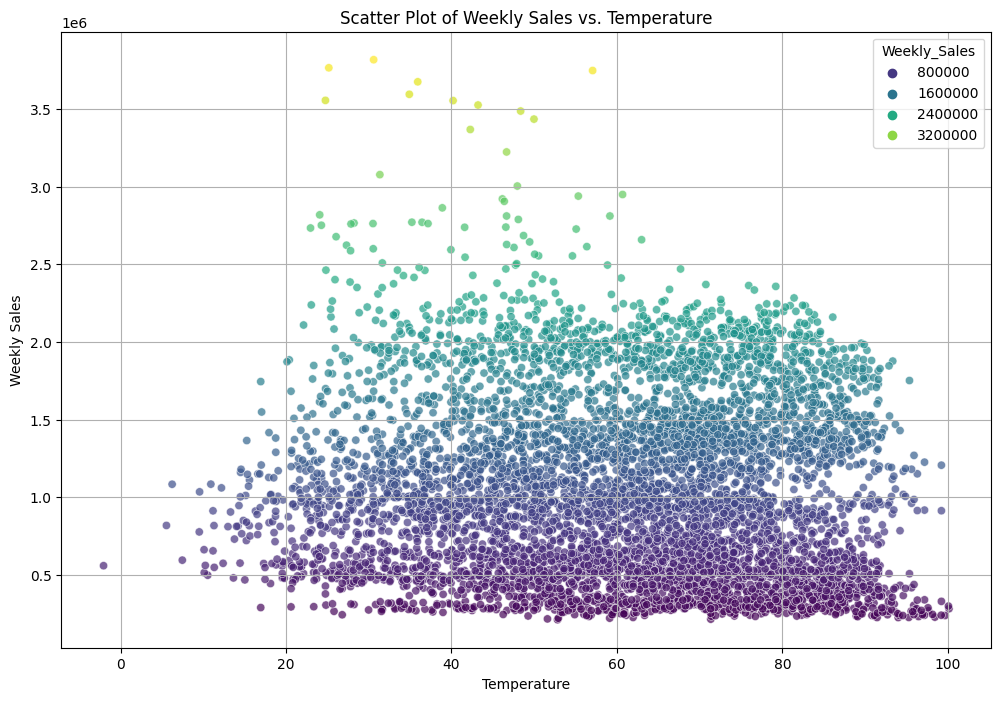

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Weekly_Sales', palette='viridis', alpha=0.7)

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. Temperature')
plt.grid(True)
plt.show()

Cada punto representa una observación, donde el eje x representa el valor de la temperatura y el eje y representa el valor de las ventas semanales. Además, el color de los puntos representa las ventas semanales, y la escala de colores varía según los valores de ventas. De esta manera, podemos visualizar la relación entre la temperatura y las ventas semanales con más detalle.

# 8 What is the correlation between weekly sales and fuel price?

In [20]:
corr_sales_fuel = df['Weekly_Sales'].corr(df['Fuel_Price'])
print("Correlation between weekly sales and fuel price:", corr_sales_fuel)

Correlation between weekly sales and fuel price: 0.009463786314475114


El coeficiente de correlación entre las ventas semanales y el precio del combustible es aproximadamente 0.009. Dado que el coeficiente de correlación está muy cerca de cero, indica una relación lineal muy débil entre estas dos variables.

# 9. Correlation between weekly sales and CPI

In [21]:
corr_coeff = df['Weekly_Sales'].corr(df['CPI'])
print("Correlation between Weekly_Sales and CPI:", corr_coeff)

Correlation between Weekly_Sales and CPI: -0.07263416204017631



El coeficiente de correlación entre las ventas semanales y el Índice de Precios al Consumidor (IPC) es -0.0726. Dado que este valor es negativo, indica una leve relación lineal negativa entre las dos variables.

# General correlation matrix

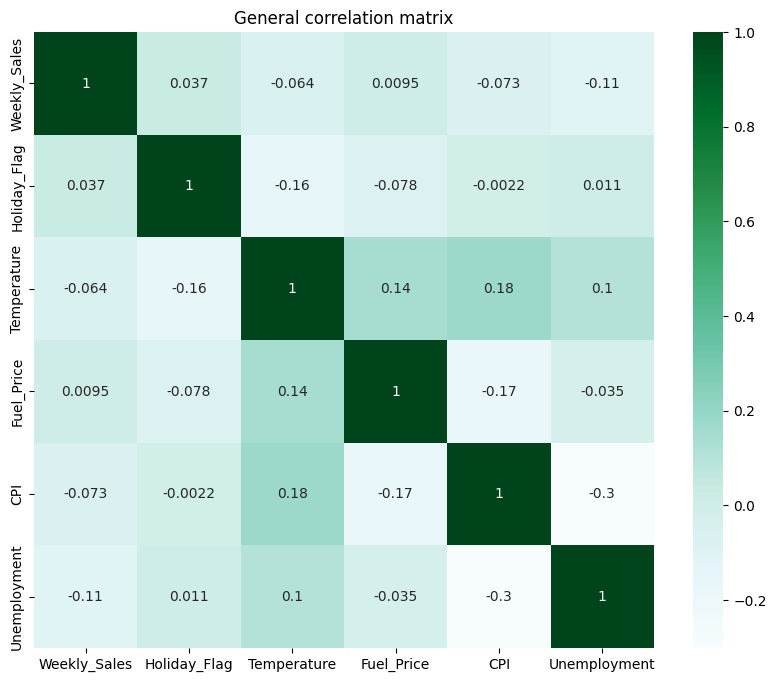

In [22]:
corr = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

cmap = sns.color_palette("BuGn", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=cmap, ax=ax)
ax.set_title('General correlation matrix')
plt.show()

* La variable Weekly_Sales tiene una correlación positiva con la variable Holiday_Flag. Esto indica que las ventas aumentan en días festivos.

* La variable Weekly_Sales tiene una correlación negativa con las variables Temperature, Fuel_Price, CPI y Unemployment. Esto indica que las ventas disminuyen a medida que aumentan la temperatura, el precio del combustible, el índice de precios al consumidor y la tasa de desempleo.

* La variable Weekly_Sales no está relacionada con la variable General_correlation_matrix. Esto indica que la matriz de correlación general no afecta a las ventas.

* Existen diversos grados de correlaciones positivas o negativas entre otras variables. Por ejemplo, hay una correlación positiva entre Temperature y Fuel_Price; hay una correlación negativa entre CPI y Unemployment.